# Математическая статистика
## Шульжик Дмитрий
#### 4 курс 1 группа
#### 12.01.2022

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

## Дискретное распределение №1

In [66]:
data = np.load('distributions/1_discrete.npy')
size = data.size

###  Числовые характеристики

In [67]:
data_mean = data.mean() # выборочное среднее

second_moment = sum((data - data_mean) ** 2) / size # второй выборочный центральный момент
third_moment = sum((data - data_mean) ** 3) / size # третий выборочный центральный момент
fourth_moment = sum((data - data_mean) ** 4) / size # четвертый выборочный центральный момент

data_dispersion = (size / (size - 1)) * second_moment # несмещенная выборочная дисперсия
data_std =  data_dispersion ** 0.5 # среднеквадратическое отклонение

data_median = np.median(data) # медиана
data_moda = np.argmax(np.bincount(data)) # мода

data_asymmetry = third_moment / (data_std ** 3) # коэффициент асимметрии
data_excess = fourth_moment / (data_std ** 4) # коэффициент эксцесса

In [68]:
print (' Выборочное среднее: {} \n Второй выборочный центральный момент: {} \n Третий выборочный центральный момент: {} \n Четвертый выборочный центральный момент: {} \n Несмещенная выборочная дисперсия: {} \n Среднеквадратическое отклонение: {} \n Медиана: {} \n Мода: {} \n Асимметрия: {} \n Эксцесс: {}'.format(data_mean, second_moment, third_moment,
                            fourth_moment, data_dispersion,data_std,
                            data_median, data_moda, data_asymmetry, data_excess))

 Выборочное среднее: 41.998433 
 Второй выборочный центральный момент: 41.991734544487066 
 Третий выборочный центральный момент: 42.96273214802355 
 Четвертый выборочный центральный момент: 5325.017576762405 
 Несмещенная выборочная дисперсия: 41.9917765362636 
 Среднеквадратическое отклонение: 6.480106213347401 
 Медиана: 42.0 
 Мода: 42 
 Асимметрия: 0.15788668956734572 
 Эксцесс: 3.019899904579502


## Проверка гипотезы о распределении генеральной совокупности по закону Пуассона
### Критерий Пирсона

#### Правило Стёрджеса

In [69]:
delta = round((max(data) - min(data)) / (1 + np.math.log2(size)))

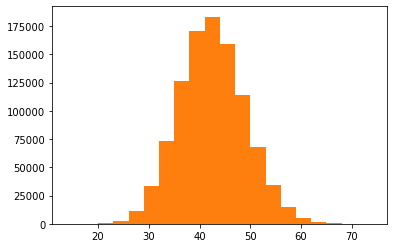

In [70]:
frequencies = plt.hist(data, bins=np.arange(min(data), max(data) + delta - 1, delta))[0] # частоты
variation_series = plt.hist(data, bins=np.arange(min(data), max(data) - 1, delta))[1] # вариационный ряд

In [71]:
pd.DataFrame(frequencies, variation_series, columns = ['Частота']).T

,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71
Частота,8.0,47.0,455.0,2715.0,11130.0,33268.0,73379.0,126844.0,170539.0,183375.0,159185.0,113860.0,68151.0,34485.0,14996.0,5353.0,1626.0,458.0,107.0,18.0


##### Число степеней свободы

In [93]:
k = variation_series.size - 1
print(k)

19


##### Уровень значимости
p = 0.95
##### Хи-квадрат
$\chi_k^2 = 30.1$

In [95]:
chi_k_p = 30.1 

In [96]:
alpha = 0.05
def poisson(x, λ=1):
    return ((λ ** x) * np.exp(-λ)) / np.math.factorial(x)

In [97]:
expected_frequencies = np.array([sum(poisson(element + i, data_mean) for i in range(0, delta)) * size  for element in variation_series])

In [98]:
X = sum(((frequencies - expected_frequencies) ** 2) / expected_frequencies)
print(X)

29.73787930662049


In [99]:
X < chi_k_p

True

## Непрерывное распределение №2

In [18]:
data = np.load('distributions/2_continuous.npy')
size = data.size

###  Числовые характеристики

In [19]:
data_mean = data.mean() # выборочное среднее

second_moment = sum((data - data_mean) ** 2) / size # второй выборочный центральный момент
third_moment = sum((data - data_mean) ** 3) / size # третий выборочный центральный момент
fourth_moment = sum((data - data_mean) ** 4) / size # четвертый выборочный центральный момент

data_dispersion = (size / (size - 1)) * second_moment # несмещенная выборочная дисперсия
data_std =  data_dispersion ** 0.5 # среднеквадратическое отклонение

data_median = np.median(data) # медиана

data_asymmetry = third_moment / (data_std ** 3) # коэффициент асимметрии
data_excess = fourth_moment / (data_std ** 4) # коэффициент эксцесса

In [292]:
print('Выборочное среднее: ', data_mean)
print('Второй выборочный центральный момент: ', second_moment)
print('Третий выборочный центральный момент: ', third_moment)
print('Четвертый выборочный центральный момент: ', fourth_moment)
print('Несмещенная выборочная дисперсия: ', data_dispersion)
print('Среднеквадратическое отклонение: ', data_std)
print('Медиана: ', data_median)
print('Асимметрия: ', data_asymmetry)
print('Эксцесс: ', data_excess)

Выборочное среднее:  60.009488311983354
Второй выборочный центральный момент:  719.4899403199785
Третий выборочный центральный момент:  17252.10784273003
Четвертый выборочный центральный момент:  2169983.2692477736
Несмещенная выборочная дисперсия:  719.4906598106382
Среднеквадратическое отклонение:  26.82332305682199
Медиана:  56.03575838731679
Асимметрия:  0.8939318757459171
Эксцесс:  4.191853194363005


## Проверка гипотезы о распределении генеральной совокупности 
### Критерий Пирсона

#### Правило Стёрджеса

In [299]:
delta = (max(data) - min(data)) / (1 + np.math.log2(size))
print(delta)

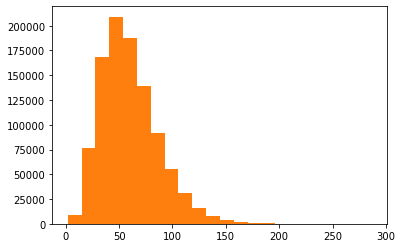

In [300]:
frequencies = plt.hist(data, bins = np.arange(min(data), max(data) + 1 + delta , delta))[0] # частоты
variation_series = plt.hist(data, bins = np.arange(min(data), max(data) + 1 , delta))[1] # вариационный ряд

In [301]:
pd.DataFrame(frequencies, variation_series, columns = ['Частота']).T

,1.858583,14.814648,27.770713,40.726778,53.682843,66.638908,79.594973,92.551038,105.507103,118.463168,...,157.331363,170.287428,183.243493,196.199558,209.155623,222.111688,235.067753,248.023818,260.979882,273.935947
Частота,8527.0,76917.0,168568.0,209085.0,187998.0,139553.0,91779.0,54904.0,30970.0,16128.0,...,1887.0,855.0,390.0,171.0,79.0,28.0,17.0,6.0,3.0,0.0


##### Число степеней свободы

In [302]:
k = variation_series.size - 2
print(k)

20


## Непрерывное распределение №3

In [311]:
data = np.load('distributions/3_continuous.npy')
size = data.size

###  Числовые характеристики

In [312]:
data_mean = data.mean() # выборочное среднее

second_moment = sum((data - data_mean) ** 2) / size # второй выборочный центральный момент
third_moment = sum((data - data_mean) ** 3) / size # третий выборочный центральный момент
fourth_moment = sum((data - data_mean) ** 4) / size # четвертый выборочный центральный момент

data_dispersion = (size / (size - 1)) * second_moment # несмещенная выборочная дисперсия
data_std =  data_dispersion ** 0.5 # среднеквадратическое отклонение

data_median = np.median(data) # медиана

data_asymmetry = third_moment / (data_std ** 3) # коэффициент асимметрии
data_excess = fourth_moment / (data_std ** 4) # коэффициент эксцесса

In [313]:
print('Выборочное среднее: ', data_mean)
print('Второй выборочный центральный момент: ', second_moment)
print('Третий выборочный центральный момент: ', third_moment)
print('Четвертый выборочный центральный момент: ', fourth_moment)
print('Несмещенная выборочная дисперсия: ', data_dispersion)
print('Среднеквадратическое отклонение: ', data_std)
print('Медиана: ', data_median)
print('Асимметрия: ', data_asymmetry)
print('Эксцесс: ', data_excess)

Выборочное среднее:  0.29423835800334897
Второй выборочный центральный момент:  0.011539073599220942
Третий выборочный центральный момент:  0.0005020182721310613
Четвертый выборочный центральный момент:  0.0003918146233682603
Несмещенная выборочная дисперсия:  0.011539085138306081
Среднеквадратическое отклонение:  0.10742013376600348
Медиана:  0.28589959209396476
Асимметрия:  0.4050069333920556
Эксцесс:  2.942645090091734


## Проверка гипотезы о распределении генеральной совокупности 
### Критерий Пирсона

#### Правило Стёрджеса

In [319]:
delta = (max(data) - min(data)) / (1 + np.math.log2(size))
print(delta)

0.039203098949428354


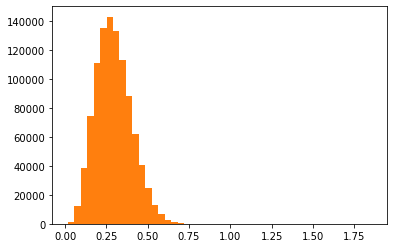

In [320]:
frequencies = plt.hist(data, bins = np.arange(min(data), max(data) + 1 + delta , delta))[0] # частоты
variation_series = plt.hist(data, bins = np.arange(min(data), max(data) + 1 , delta))[1] # вариационный ряд

In [321]:
pd.DataFrame(frequencies, variation_series, columns = ['Частота']).T

,0.015552,0.054755,0.093958,0.133161,0.172364,0.211567,0.250770,0.289973,0.329177,0.368380,...,1.466066,1.505270,1.544473,1.583676,1.622879,1.662082,1.701285,1.740488,1.779691,1.818894
Частота,1306.0,12037.0,38237.0,74414.0,111166.0,134666.0,142769.0,133034.0,112979.0,87807.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
